# Project: Investigate a Dataset: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [3]:
#import of all the packages that might be used
#magic word for visualization plotting is also included below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
#loading TMDb movie data set and printing out a few lines for initial inspection
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
# Quick inspection of column(s) that are collapsed (not visible) in head/tail views:
df.loc[:,'tagline':'overview'].head()

,tagline,keywords,overview
0,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...
1,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...
2,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...
3,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...
4,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...


### Observation
The following columns contain multiple values separated by "|" pipe delimiters:
<ul>
<li>'cast'</li>
<li>'genres'</li>
<li>'keywords'</li>
<li>'production_companies'</li>
</ul>    
As per project instructions, will leave these values alone.

In [6]:
#Review of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Observations:
<ul>
    <li>There are 10866 rows and 21 columns of data</li>
    <li>The datatypes appear to be correct and not in need of further changes</li>
    <li>The column names are also consistent in format (lowercase with underscores as needed)</li>

In [7]:
#check for any duplicates:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]
#there is one duplicate row in row 2090

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Observation(s):
There is one duplicate row (index 2090) that can be deduped (removed)

In [9]:
#Check for any missing fields
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Observation:
There are several columns with missing values (cells), in particular the following columns each have over 1000 missing values:
<ul>
    <li>'homepage'</li>
    <li>'tagline'</li>
    <li>'keywords'</li>
    <li>'production_companies'</li>
    </ul>
That said, there are no instances of entire rows with missing values.  As such, and because these columns are of non-numeric datatypes, I don't plan on removing any of the above NA entries

In [69]:
#check for duplicates based on movie original_title
df[df.original_title.duplicated(keep=False)].sort_values(by=['original_title']).head(9)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5724,217316,tt2518788,0.364669,0,0,1,Michael Fassbender|Niki Lauda|Michael Schumach...,https://www.facebook.com/1thefilm,Paul Crowder,The True Story of the Drivers Who Risked Their...,...,Set in the golden era of Grand Prix Racing '1'...,112,Documentary,Exclusive Media Group|Universum Film (UFA)|Spi...,9/30/13,25,7.6,2013,0.000000e+00,0.000000e+00
5748,176068,tt2395385,0.336081,0,0,1,Rhys Wakefield|Logan Miller|Ashley Hinshaw|Nat...,NaN,Dennis Iliadis,Everyone wants one.,...,Three college friends go to the biggest party ...,95,Thriller|Science Fiction,Process Productions,9/20/13,49,5.1,2013,0.000000e+00,0.000000e+00
1400,12244,tt0472033,2.846465,30000000,48428063,9,Elijah Wood|John C. Reilly|Jennifer Connelly|C...,NaN,Shane Acker,When our world ended their mission began.,...,"When 9 first comes to life, he finds himself i...",79,Action|Adventure|Animation|Science Fiction|Thr...,Focus Films|Starz Animation|Relativity Media|T...,8/19/09,851,6.5,2009,3.049201e+07,4.922230e+07
6514,98622,tt0443424,0.128484,0,0,9,NaN,http://www.shaneacker.com,Shane Acker,NaN,...,A rag doll fights a monster that has been stea...,11,Animation|Fantasy,NaN,4/21/05,49,7.3,2005,0.000000e+00,0.000000e+00
1416,17979,tt1067106,1.714887,200000000,325233863,A Christmas Carol,Gary Oldman|Jim Carrey|Steve Valentine|Daryl S...,http://disney.go.com/disneypictures/achristmas...,Robert Zemeckis,Season's Greedings,...,Miser Ebenezer Scrooge is awakened on Christma...,96,Animation|Drama,Walt Disney|ImageMovers,11/4/09,619,6.6,2009,2.032801e+08,3.305678e+08
2489,16716,tt0216621,0.521573,0,0,A Christmas Carol,Patrick Stewart|Richard E. Grant|Joel Grey|Ian...,NaN,David Hugh Jones,NaN,...,Scrooge is a miserly old businessman in 1840's...,95,Drama|Fantasy,Turner Network Television (TNT)|Hallmark Enter...,12/5/99,23,6.1,1999,0.000000e+00,0.000000e+00
7917,13189,tt0087056,0.542315,0,0,A Christmas Carol,George C. Scott|Roger Rees|David Warner|Susann...,NaN,Clive Donner,A new powerful presentation of the most loved ...,...,An old bitter miser who makes excuses for his ...,100,TV Movie|Fantasy|Drama|Comedy|Family,Entertainment Partners Ltd.,12/17/84,29,6.6,1984,0.000000e+00,0.000000e+00
1994,23437,tt1179056,1.074308,35000000,115664037,A Nightmare on Elm Street,Jackie Earle Haley|Katie Cassidy|Kyle Gallner|...,http://www.nightmareonelmstreet.com/,Samuel Bayer,Never Sleep Again.,...,The film that brings back horror icon Freddy K...,95,Horror|Mystery|Thriller,New Line Cinema|Platinum Dunes,4/30/10,423,5.5,2010,3.500000e+07,1.156640e+08
7891,377,tt0087800,1.331432,1800000,25504513,A Nightmare on Elm Street,John Saxon|Ronee Blakley|Heather Langenkamp|Am...,NaN,Wes Craven,"If Nancy Doesn't Wake Up Screaming, She Won't ...",...,Teenagers in a small town are dropping like fl...,91,Horror,New Line Cinema|Smart Egg Pictures,11/15/84,625,7.1,1984,3.778276e+06,5.353504e+07


### Observation:
There are several hundred remakes of movies, but these do not qualify as duplicate entries given they have different casts and release dates

In [11]:
#review some summary statistics:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Observations
<ul>
    <li>Accounting for the aforementioned duplicate row, there are unique 10865 movie entries</li>
    <li>The columns: 'budget', 'revenue', 'budget_adj', 'revenue_adj' are in scientific notation</li>
<li>The dataset includes movies released between 1960 through 2015, with the average being around 2001</li>
    <li>There appear to be some missing entries that are filled in with '0' zero values, including:</li>
    <ul>
        <li>'budget'</li>
        <li>'revenue'</li>
        <li>'runtime'</li>
        <li>'budget_adj'</li>
        <li>'revenue_adj'</li>
    </ul>

In [14]:
#let's dig a little deeper into these zero values:
df.query('revenue_adj == 0').id.nunique()

6016

In [19]:
df.query('revenue == 0').describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6016.000000,6016.000000,6.016000e+03,6016.0,6016.000000,6016.000000,6016.000000,6016.000000,6.016000e+03,6016.0
mean,83388.397440,0.325041,2.578095e+06,0.0,97.319315,40.975731,5.834774,2001.645944,3.354166e+06,0.0
std,102167.918009,0.303061,8.818167e+06,0.0,36.998833,67.208526,1.010550,13.726299,1.143445e+07,0.0
min,17.000000,0.000065,0.000000e+00,0.0,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.0
25%,14347.750000,0.146901,0.000000e+00,0.0,88.000000,13.000000,5.200000,1996.000000,0.000000e+00,0.0
50%,30060.500000,0.261640,0.000000e+00,0.0,95.000000,21.000000,5.900000,2007.000000,0.000000e+00,0.0
75%,118997.000000,0.419151,0.000000e+00,0.0,105.000000,40.000000,6.500000,2012.000000,0.000000e+00,0.0
max,414419.000000,8.411577,1.500000e+08,0.0,900.000000,1143.000000,9.200000,2015.000000,1.500000e+08,0.0


### Observations
<ul>
    <li>There appear to be 6016 entries where missing revenue_adj values are filled in with 0 values, however as the values don't appear to affect other properties like popularity, I won't be removing these values at least not right away.</li>
  <li>This data set spans movies released between 1960 to 2015

In [21]:
#let's see if the entries with runtime of 0 is of concern:
df.query('runtime == 0').id.nunique()

31

In [22]:
df.query('runtime == 0').describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,31.000000,31.000000,3.100000e+01,31.0,31.0,31.000000,31.000000,31.000000,3.100000e+01,31.0
mean,176589.096774,0.186411,3.629032e+05,0.0,0.0,20.838710,5.509677,2010.612903,4.032336e+05,0.0
std,130298.949032,0.333162,1.244720e+06,0.0,0.0,15.358161,0.860757,4.528999,1.435415e+06,0.0
min,13713.000000,0.006440,0.000000e+00,0.0,0.0,10.000000,3.400000,2000.000000,0.000000e+00,0.0
25%,45336.000000,0.041329,0.000000e+00,0.0,0.0,12.000000,5.100000,2008.500000,0.000000e+00,0.0
50%,173847.000000,0.096455,0.000000e+00,0.0,0.0,15.000000,5.500000,2012.000000,0.000000e+00,0.0
75%,292733.500000,0.174180,0.000000e+00,0.0,0.0,25.000000,5.850000,2014.000000,0.000000e+00,0.0
max,370687.000000,1.876037,6.000000e+06,0.0,0.0,80.000000,7.500000,2015.000000,7.273568e+06,0.0


### Observations
<ul>
    <li>There appear to be several entries where missing runtime values are filled in with 0 values however it doesn't appear to affect the popularity, so will keep at least for now</li>

### Exploratory Questions:

<ul>
    <li>Which genres are most popular from year to year?</li>
    <li>What kinds of properties are associated with movies that have high revenues?</li>
    </ul>
First, let's do some data clean up.

### Data Cleaning: remove duplicates

In [18]:
#drop duplicate row and verify success
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [27]:
#For the second exploratory question, will create another dataframe
#new dataframe will have entries with zero revenue values removed so as to avoid skewing the results:
df_rev = df.query('revenue != 0')
df_rev.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that I've trimmed and cleaned the data, I'm ready to move on to exploration. I'll compute statistics and create visualizations with the goal of addressing the research questions posed in the prior section.

### Research Question 1: Which genres are most popular from year to year? 

In [28]:
#Let's first explore how many unique genres there are across the years:
df.genres.nunique()


2039

In [31]:
#Let's also get a feel for the most popular genres across time:
df.genres.value_counts().head(5)

Comedy           712
Drama            712
Documentary      312
Drama|Romance    289
Comedy|Drama     280
Name: genres, dtype: int64

### Observation(s)
<ul>
    <li>There are 2039 unique combinations of genres</li>
    <li>Overall and across time, the most popular genres for release are Drama and Comedy followed by Drama|Romance and Comedy|Drama:</li>
</ul>
Now let's analyze movie genres from year to year:

In [34]:
#As the data set spans 55 yrs, we'll create a new dataframe to capture the avg popularity of each genre per year
#From that data frame, we'll also create another dataframe to identify the most popular genre for each year
avg_pop_yr = df.groupby(['release_year', 'genres'],as_index=False).popularity.mean()
most_pop_yr = avg_pop_yr.groupby('release_year',as_index=False).max()

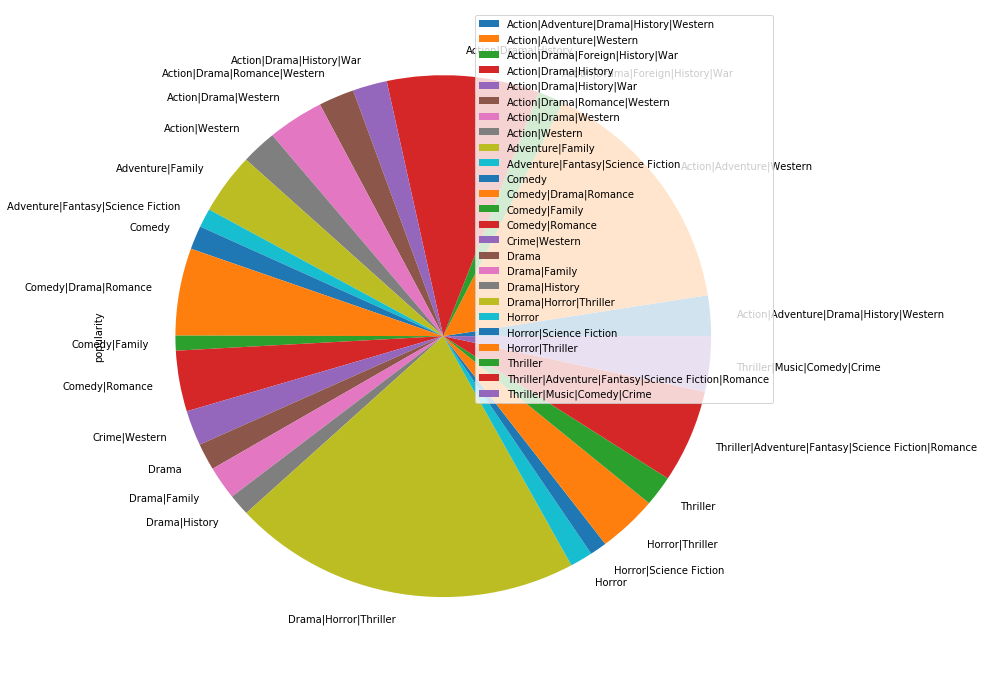

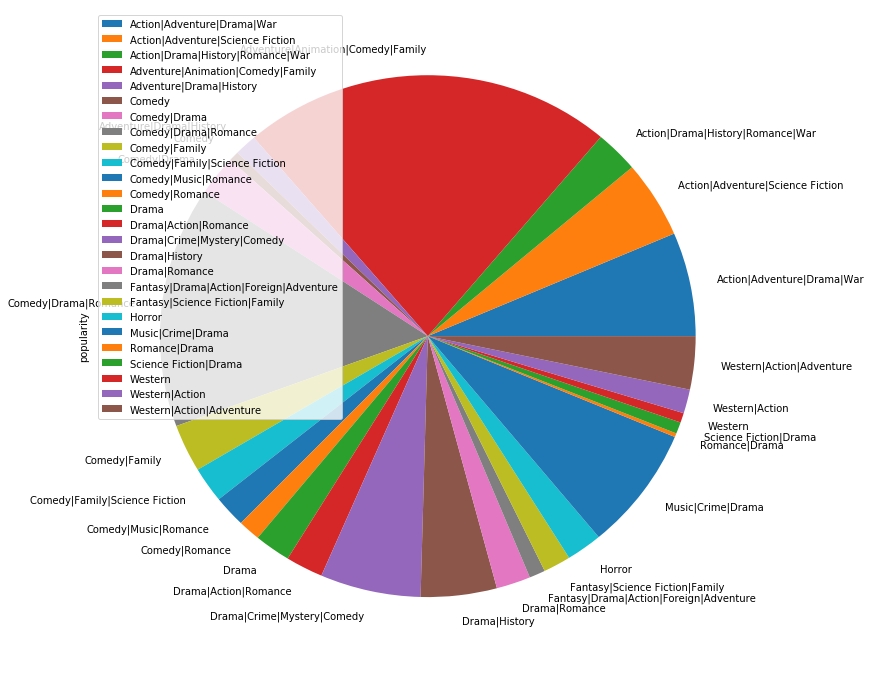

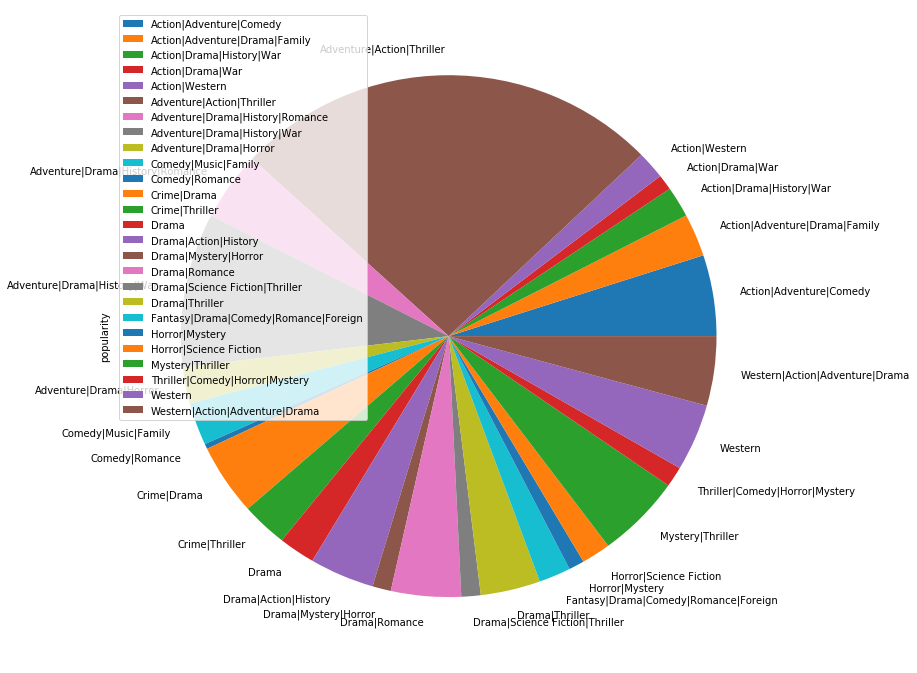

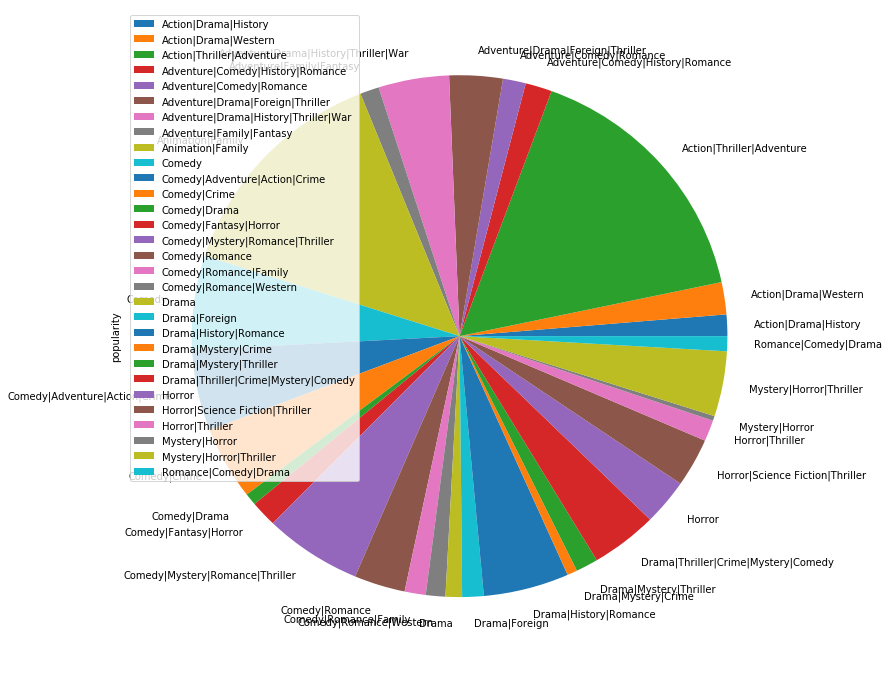

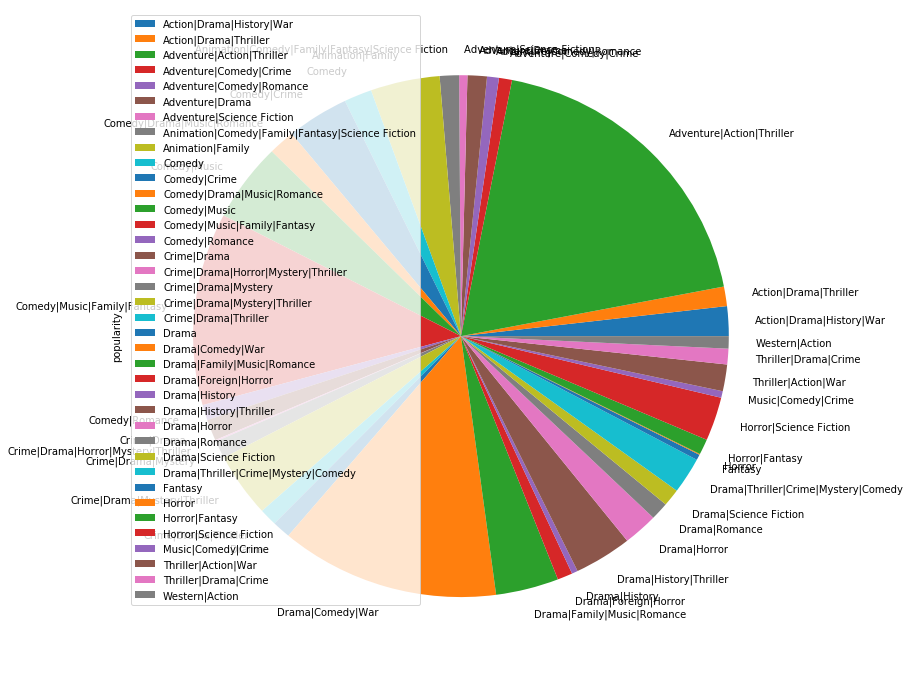

In [36]:
#From the avg_pop_yr dataframe we can visualize how the popularity of genres change over the years as follows
#We could create a pie chart to show popularity of different movie genres over the years and run a For Loop for each year
#We would want to change the end date for the arange function when running the for loop below from 1965 to whatever value we'd like:
#that said, not running full 55 year span as that would eat up too much memory:

movie_years = np.arange(1960,1965)
for i in movie_years:
    avg_pop_yr.query('release_year =={}'.format(i)).iloc[:, 1:].set_index('genres').plot(kind='pie', y='popularity', figsize = (12,12))
    plt.title = 'popularity by genre for {}'.format(i);


### Observation(s)

The above approach is helpful for visualizing how popular genres as popular 'each' year, however to get a sense of how movies are popular across the 55 year data set, we can reference the second new dataframe we created to get a count of most popular movie genres as follows:

In [37]:
#here we identify the most popular movie genres per year
most_pop_yr.head()

,release_year,genres,popularity
0,1960,Thriller|Music|Comedy|Crime,2.610362
1,1961,Western|Action|Adventure,2.631987
2,1962,Western|Action|Adventure|Drama,3.170651
3,1963,Romance|Comedy|Drama,2.508235
4,1964,Western|Action,3.153791


In [38]:
#here we identify the most popular movie genres across years
most_pop_yr.genres.value_counts().head(5)

Western              12
War|Drama|Romance     2
Western|Drama         2
War|Drama             2
Thriller|Horror       2
Name: genres, dtype: int64

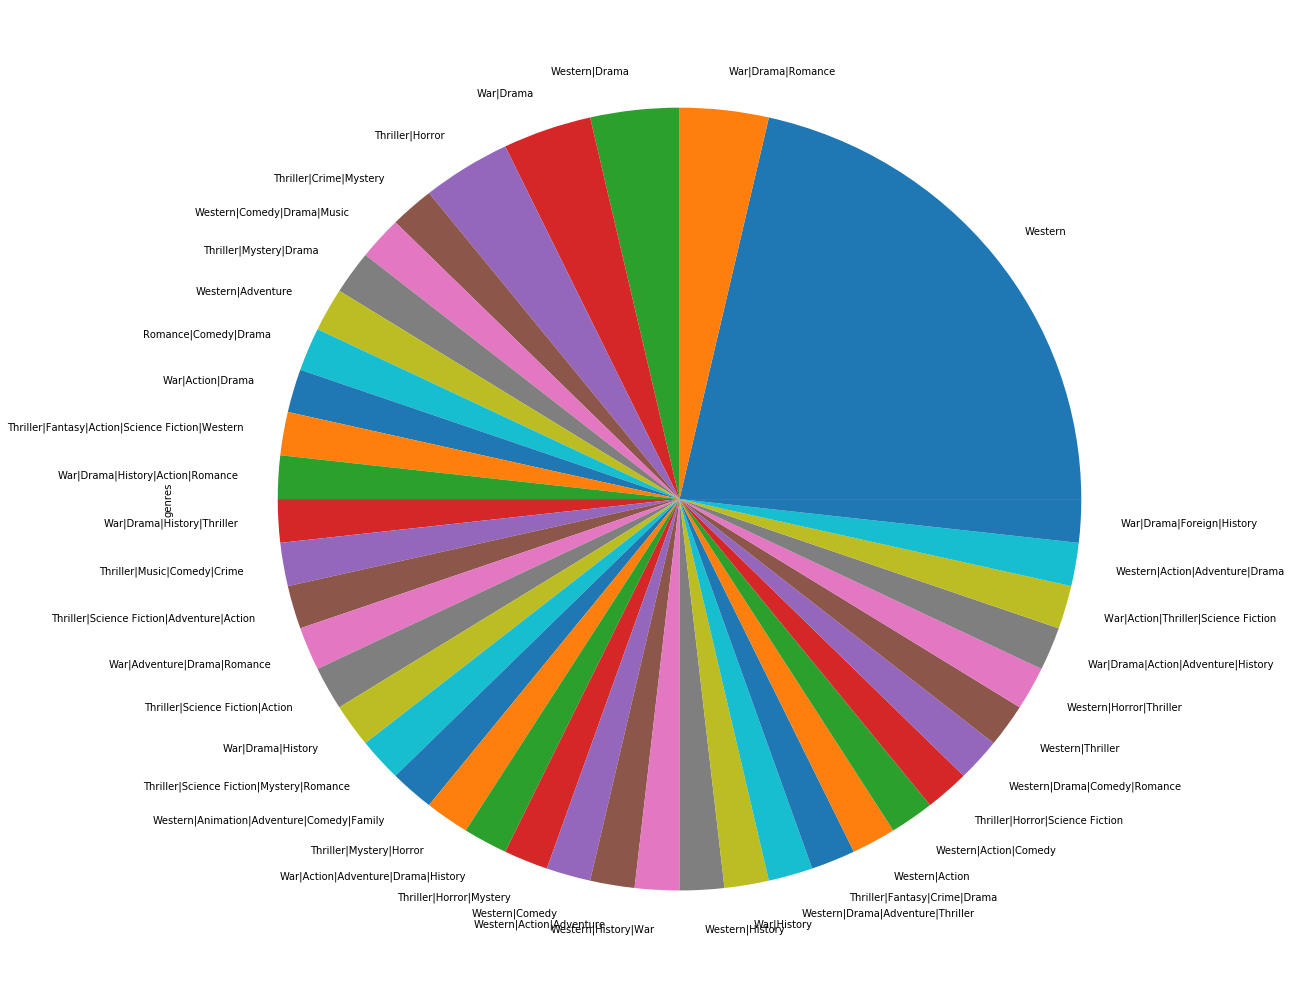

In [39]:
#Now we'll chart the distribution of most popular movie genres across the years from 1960 to 2015
most_pop_yr.genres.value_counts().plot(kind='pie',figsize=(18,18))

### Observation(s)
It appears Westerns are by far the most popular movie genre across time for this dataset

### Research Question 2: What kinds of properties are associated with movies that have high revenues?
Let's determine whether there are positive correlations between high revenues and other attributes like budget etc.

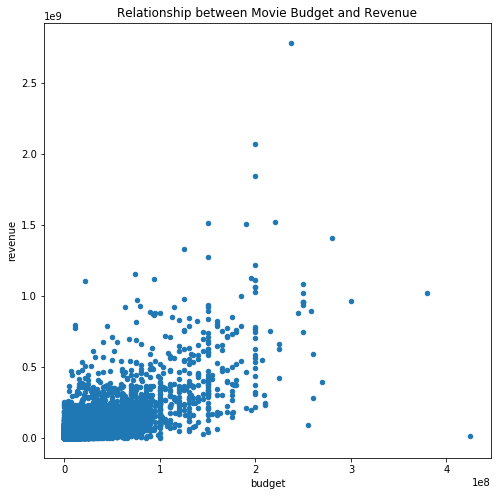

In [57]:
#to avoid skewing the results, we'll use the dataframe 'df_rev' we created earlier (i.e. 0 revenue entries removed):
df_rev.plot(kind='scatter', x='budget', y='revenue', figsize = (8,8), title = "Relationship between Movie Budget and Revenue");

### Observation(s)
There appears to be a positive correlation between a movie's budget and it's revenue.

I guess the saying is true: "Sometimes you have to spend money to make money", or perhaps more apt would be "the more you put in, the more you get out".

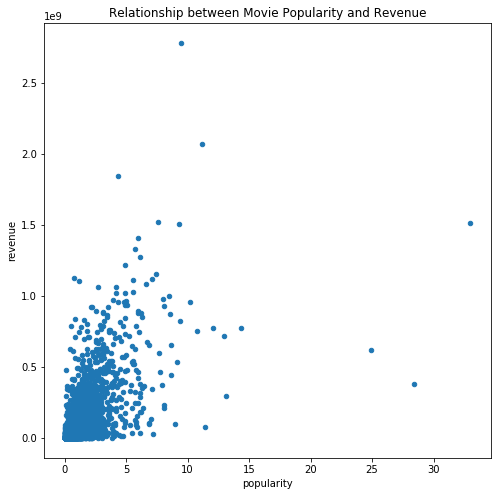

In [58]:
#next let's investigate any correlation between a movie's popularity and it's revenue:
df_rev.plot(kind='scatter', x='popularity', y='revenue', figsize = (8,8), title="Relationship between Movie Popularity and Revenue");

### Observation(s)
Ther appears to be a positive correlation between a movie's popularity and it's revenue


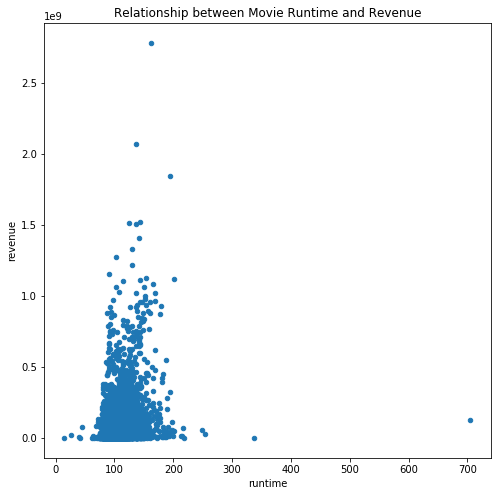

In [59]:
df_rev.plot(kind='scatter', x='runtime', y='revenue', figsize = (8,8), title = "Relationship between Movie Runtime and Revenue");
# no apparent correlation between runtime and revenue

### Observation(s)
There does not appear to be a any correlation between a movie's popularity and it's revenue


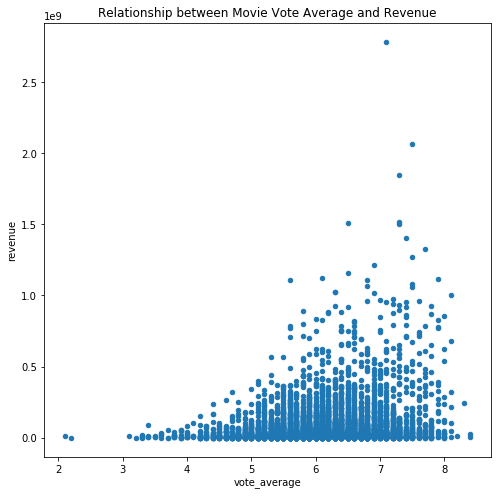

In [60]:
#Next let's review any possible relationship between the Movie Vote Average and Revenue
df_rev.plot(kind='scatter', x='vote_average', y='revenue', figsize = (8,8), title = "Relationship between Movie Vote Average and Revenue");

### Observation(s)
There appears to be a slightly positive correlation between a movie's vote_average it's revenue

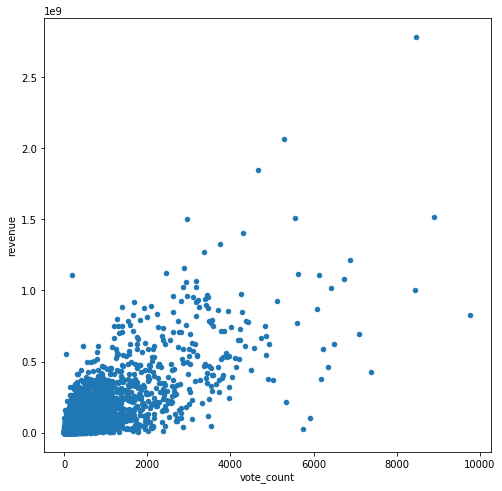

In [62]:
#Next, we'll review the relationship between vote_count and revenue:
df_rev.plot(kind='scatter', x='vote_count', y='revenue', figsize = (8,8));

### Observation(s)
There appears to be a positive correlation between a movie's vote_count it's revenue

### Bonus Exploratory Question
Which movie is the highest grossing of all time?

In [63]:
df_rev.loc[df.revenue.idxmax()]

id                                                                  19995
imdb_id                                                         tt0499549
popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                      http://www.avatarmovie.com/
director                                                    James Cameron
tagline                                       Enter the World of Pandora.
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                                                               162
genres                           Actio

### Observation(s)
Avatar was the highest grossing movie of all time with revenue of ~$2.78 Billion

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0